In [20]:
from sklearn import decomposition, svm
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
data = load_breast_cancer()


In [22]:
X_train, X_test, y_train, y_test = train_test_split(data.data,
                                                    data.target, random_state=0, train_size=0.2)

In [23]:
clf = Pipeline([('pca', decomposition.PCA(n_components=15, whiten=True)),
                ('svm', svm.LinearSVC(C=1.0))])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [24]:
accuracy_score(y_test, y_pred)

0.9451754385964912

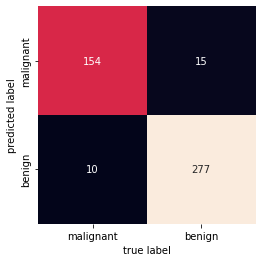

In [25]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(y_pred, y_test)
ax = sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                 xticklabels=data.target_names,
                 yticklabels=data.target_names)
ax.set_ylim(2.0, 0)
plt.xlabel('true label')
plt.ylabel('predicted label');